In [35]:
## thư viện của python
import pandas as pd
import os ##Operating System
import matplotlib.pyplot as plt

In [36]:
path ='data/'
dataframe = pd.read_csv(path + 'sales2019_1.csv')
dataframe.head(10) ##in ra 10 hàng dữ liệu ( 0 - 9 )

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [37]:
frames = []
all_length=[]
for file in os.listdir(path): ##trả về một danh sách chứa tất cả các file được chỉ định(ở đây là .csv)
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1) ##chứa các dataframe đó vào trong một danh sách
        result = pd.concat(frames) ##kết hợp tát cả các dataframe lại thành một DataFrame lớn 
        length_1month = len(df1.index) ##sử dụng .index để tính số hàng của df
        all_length.append(length_1month)

df = result
df.to_csv('SaleRP2019.csv', index=False) ##xuất thành file

In [38]:
print(sum(all_length))

186850


In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [40]:
## Add column in df
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [41]:
##lấy dữ liệu tháng ở OrderDate 
df['Order Date'].str[0:2] ##cắt chuỗi để lại 2 số đầu(mình đang muốn lấy tháng)
##df['Order Date'].str.slice(start = 0, stop = 2, step = 1) | đây là cách ghi đầy đủ, có thể bỏ step


0        01
1        01
2        01
3        01
4        01
         ..
11681    09
11682    09
11683    09
11684    09
11685    09
Name: Order Date, Length: 186850, dtype: object

In [42]:
##In dữ liệu cột tháng
print(set(df["Month"])) 

{'05', '07', '11', '12', '06', '03', '08', 'Or', '04', '02', '01', '09', nan, '10'}


In [43]:
##Loại bỏ những hàng có giá trị bị mất ( nan )
df = df.dropna(how = 'all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [44]:
df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## REPORT

### What the best month for sales? How much was earned that month?

In [45]:
#Kiểm tra Quantity Ordered và Price Each có phải là kiểu Int không
print(df['Quantity Ordered'].dtype)
print(df['Price Each'].dtype)

object
object


In [46]:
#convert kiểu dữ liệu sang int
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce', downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce', downcast='float')

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_27336\3824160579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce', downcast='integer')
C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_27336\3824160579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce', downcast='float')


In [47]:
# Tạo cột Sale để lưu giá trị đơn hàng
df["Sale"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_27336\3083015705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sale"] = df["Quantity Ordered"] * df["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1.0,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1.0,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2.0,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1.0,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1.0,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [48]:
#cắt cột Sale ra khỏi df và thêm vào vị trí mong muốn
moving_col = df.pop('Sale')
df.insert(4, 'Sale', moving_col) 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1.0,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2.0,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1.0,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1.0,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [49]:
# Sử dụng apply để định dạng cột 'Sale'
df['Sale'] = df['Sale'].apply(lambda x: "{:.2f}".format(x))

df['Sale']

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_27336\1756790141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale'] = df['Sale'].apply(lambda x: "{:.2f}".format(x))


0        700.00
1         14.95
2         23.98
3        149.99
4         11.99
          ...  
11681      8.97
11682    700.00
11683    700.00
11684    379.99
11685     11.95
Name: Sale, Length: 186305, dtype: object

In [50]:
##đổi Sale sang float
df['Sale'] = df['Sale'].astype(float)


C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_27336\2449694414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale'] = df['Sale'].astype(float)


In [51]:

#lọc dữ liệu doanh thu theo từng tháng
df.groupby('Month').sum()['Sale']

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Or          0.00
Name: Sale, dtype: float64

In [52]:
sale_value = df.groupby('Month').sum()['Sale']
max_sale = sale_value.max()
print('Doanh thu cao nhất theo tháng là ' + str(max_sale) + ' USD')

Doanh thu cao nhất theo tháng là 4613443.34 USD


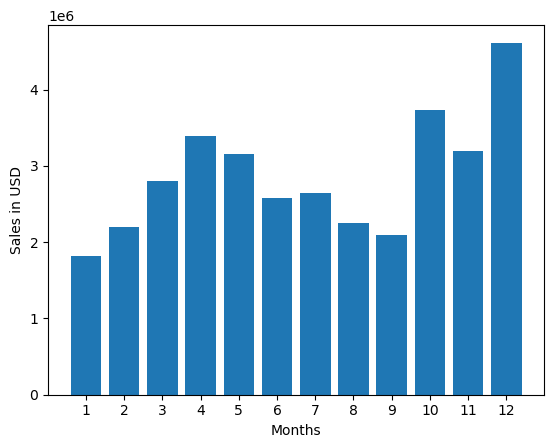

In [53]:
#sử dụng matplotlib để vẽ biểu đồ
months = range(1, 13)
plt.bar(x=months, height=sale_value[:-1])  # Loại bỏ phần tử cuối cùng của sale_value
plt.xticks(months) #truyền thông số vào trục x
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

##### What city has the best sales?

In [55]:
df['City'] = ''
df.head()

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_27336\1730363590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = ''


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,141234,iPhone,1.0,700.000000,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,
1,141235,Lightning Charging Cable,1.0,14.950000,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,
2,141236,Wired Headphones,2.0,11.990000,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,
3,141237,27in FHD Monitor,1.0,149.990005,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,
4,141238,Wired Headphones,1.0,11.990000,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,


In [58]:
data_address = df['Purchase Address']
df['City'] = data_address.str.split(',').str[1] #Cắt chuỗi lấy phần tử sau dấu ',' thứ 1
df.head()

C:\Users\D4 COMPUTER\AppData\Local\Temp\ipykernel_27336\2625287836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = data_address.str.split(',').str[1]


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,141234,iPhone,1.0,700.000000,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1.0,14.950000,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2.0,11.990000,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1.0,149.990005,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1.0,11.990000,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [59]:
#lọc dữ liệu doanh thu theo từng thành phố
df.groupby('City').sum()['Sale']

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sale, dtype: float64

In [75]:
sale_value_in_city = df.groupby('City').sum()['Sale']
max_sale_in_city = sale_value_in_city.max()
city_with_max_sale = sale_value_in_city.idxmax() # lấy tên thành phố có doanh thu cao nhất
print('Doanh thu cao nhất theo thành phố là ' + str(max_sale_in_city) + ' USD ' + 'của thành phố ' + str(city_with_max_sale))

Doanh thu cao nhất theo thành phố là 8262203.91 USD của thành phố  San Francisco


In [ ]:
#cách khác 
#address_to_city = lambda address:address.split(',')[1]
#df['City'] = df['Purchase Address'].apply(address_to_city)
#df.head()

In [85]:
cities_name = [city for city, sales in sale_value_in_city.items()]
cities_name

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

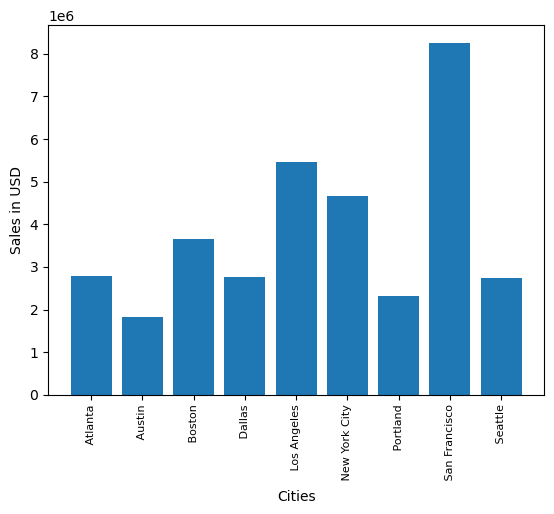

In [86]:
plt.bar(x = cities_name, height = sale_value_in_city)
plt.xticks(cities_name, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

##### What time should we display ads to maximize the likelihood of customer's buying product?

In [98]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
print(df['Order Date'].dtypes)

datetime64[ns]


In [99]:
df['Hours'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1.0,700.000000,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21.0
1,141235,Lightning Charging Cable,1.0,14.950000,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14.0
2,141236,Wired Headphones,2.0,11.990000,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13.0
3,141237,27in FHD Monitor,1.0,149.990005,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20.0
4,141238,Wired Headphones,1.0,11.990000,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11.0
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.990000,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles,20.0
11682,259354,iPhone,1.0,700.000000,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco,16.0
11683,259355,iPhone,1.0,700.000000,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco,7.0
11684,259356,34in Ultrawide Monitor,1.0,379.989990,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco,17.0


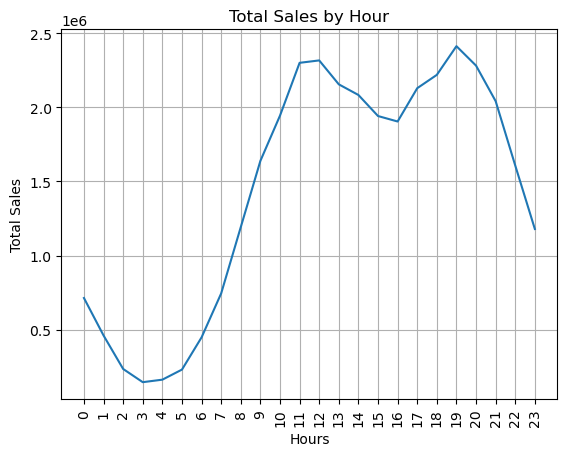

In [103]:
# Sum the 'Sales' column for each unique hour
sale_value_hours = df.groupby('Hours')['Sale'].sum()
hours = sale_value_hours.index  # Use the index as the hours

# plot : biểu đồ đường
plt.plot(hours, sale_value_hours)
plt.xticks(hours, rotation=90)
plt.grid() #lưới
plt.xlabel('Hours')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour')
plt.show()